In [1]:
!pip install rasterio


     |████████████████████████████████| 19.3MB 1.4MB/s 


In [2]:
from glob import glob
import numpy as np
import rasterio as rio
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV
import os

# Import Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
root = "/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data"

In [5]:
# fire = glob('../Data/fire/*.tif')
fire = glob(os.path.join(root, "fire", '*.tif'))
X = []
y = []
for i in fire:
    print(i)
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(1)

/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_924.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_934.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_931.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_930.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_929.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_933.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_932.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_938.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_941.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/fire_939.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/fire/f

In [6]:
# nofire = glob('../Data/nofire/*.tif')
nofire = glob(os.path.join(root, "nofire", '*.tif'))
for i in nofire:
    print(i)
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(0)

/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_598.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_600.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_603.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_604.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_602.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_606.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_605.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_609.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_607.tif
/content/drive/MyDrive/Stanford Files/Q15 Spring 2021/CS 229/Project/Data/nofire/nofire_610.tif
/content/drive/MyDrive/Stanford Files/Q1

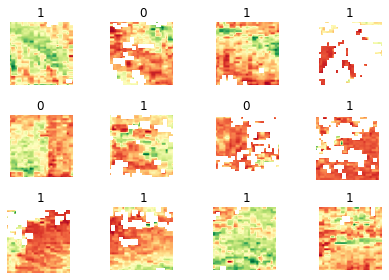

In [7]:
fig = plt.figure()

idx = np.random.randint(0,len(X), 12)

j = 1
for i in idx:
    plt.subplot(3,4,j)
    masked_array = np.ma.masked_where(X[i] == 0, X[i])
    plt.imshow(masked_array, cmap = cm.RdYlGn)
    plt.title(y[i])
    plt.axis('off')
    j+=1
    
fig.tight_layout()
plt.show()

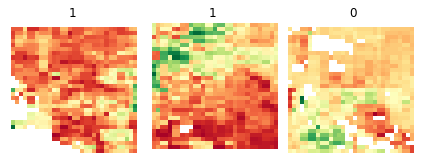

In [ ]:
fig = plt.figure()

idx = np.random.randint(0,len(X), 3)

j = 1
for i in idx:
    plt.subplot(1,3,j)
    masked_array = np.ma.masked_where(X[i] == 0, X[i])
    plt.imshow(masked_array, cmap = cm.RdYlGn)
    plt.title(y[i])
    plt.axis('off')
    j+=1

fig.tight_layout()
plt.show()

In [8]:
# stack data
X = np.stack(X)
y = np.array(y)

In [9]:
# Flatten imamges
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 42)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(2822, 1024), (2822,)
Test data and target sizes: 
(706, 1024), (706,)


# kNN Classifier

The optimal number of neighbors is 7


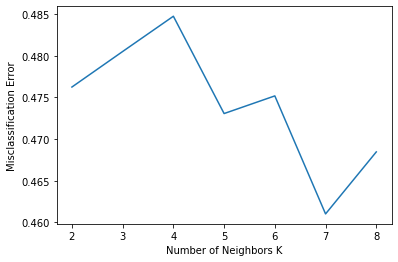

The Accuracy is 0.5311614730878187 



In [ ]:
# Cross Validation to check best k
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 42)

neighbors = list(range(2,9,1))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# Plot misclassification error
mse = [1 - x for x in cv_scores]

# determine the best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(str(optimal_k)))

# plot misclassification error vs k
plt.figure()
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# Using the optimal_k predict the test test
KNN_model = KNeighborsClassifier(n_neighbors = optimal_k)
KNN_model.fit(X_train, y_train)

# Predict on the test set
KNN_result = metrics.accuracy_score(KNN_model.predict(X_test), y_test)
train_result = metrics.accuracy_score(KNN_model.predict(X_train), y_train)
print("The Accuracy is {} \n".format(str(KNN_result)))

Confusion matrix, without normalization
[[134 163]
 [168 241]]
Normalized confusion matrix
[[0.45 0.55]
 [0.41 0.59]]


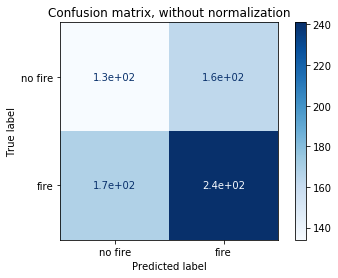

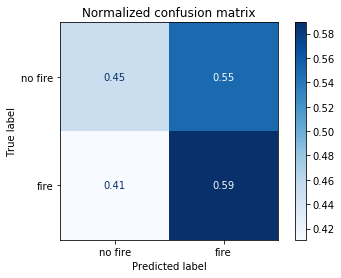

In [ ]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(KNN_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# SVM Classifier

In [ ]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
# Find best parameters
svm_param = svc_param_selection(X_train, y_train, 3)

# Fit model
svm_model = svm.SVC(kernel='rbf', gamma = svm_param['gamma'], C = svm_param['C'])
svm_model.fit(X_train, y_train)

print('Model train accuracy is',svm_model.score(X_train, y_train))
print('Model test accuracy is', svm_model.score(X_test, y_test))

Model train accuracy is 1.0
Model test accuracy is 0.6586402266288952


Confusion matrix, without normalization
[[297   0]
 [241 168]]
Normalized confusion matrix
[[1.   0.  ]
 [0.59 0.41]]


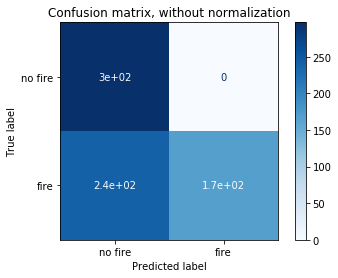

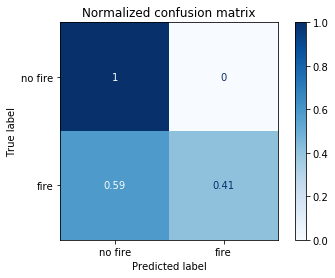

In [ ]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(svm_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
svm_param

{'C': 1, 'gamma': 0.001}

In [ ]:
# Predict labels for test data
svm_pred = svm_model.predict(X_test)

# Accuracy and Classification Reeport
print(f"Test Accuracy: {metrics.accuracy_score(y_test, svm_pred)*100}")
print(metrics.classification_report(y_test, svm_pred))

Accuracy: 60.48158640226629
              precision    recall  f1-score   support

           0       0.54      0.42      0.47       297
           1       0.64      0.74      0.68       409

    accuracy                           0.60       706
   macro avg       0.59      0.58      0.58       706
weighted avg       0.60      0.60      0.60       706



# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [11]:
n_estimators = [100,300,500,800,1200]
max_depth = [5,8,15,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators,
             max_depth = max_depth,
             min_samples_split= min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 94.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 166.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 206.7min finished


In [14]:
print(bestF.best_params_)

{'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [13]:
# Predict labels for test data
rf_pred = bestF.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_pred)*100}")
print(metrics.classification_report(y_test, rf_pred))

Accuracy: 71.95467422096317
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       297
           1       0.73      0.82      0.77       409

    accuracy                           0.72       706
   macro avg       0.72      0.70      0.70       706
weighted avg       0.72      0.72      0.71       706



Confusion matrix, without normalization
[[171 126]
 [ 72 337]]
Normalized confusion matrix
[[0.58 0.42]
 [0.18 0.82]]


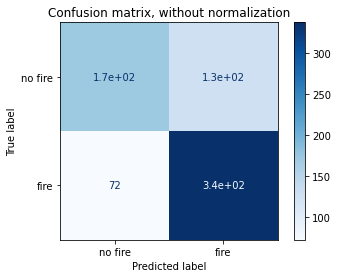

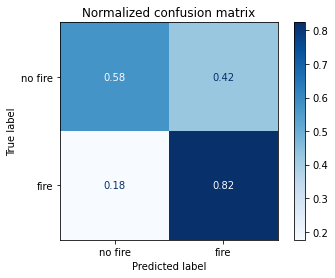

In [15]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(bestF, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# 3 months: Random Forest

In [5]:
fire = glob(os.path.join(root, "3months_fire", '*.tif'))
X = []
y = []
for i in fire:
    with rio.open(i, 'r') as f:
        X.append(f.read())
    y.append(1)

In [6]:
nofire = glob(os.path.join(root, "3months_nofire", '*.tif'))
for i in nofire:
    with rio.open(i, 'r') as f:
        X.append(f.read())
    y.append(0)

In [7]:
# stack data
X = np.stack(X)
y = np.array(y)

In [8]:
# Flatten imamges
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 42)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(2764, 3072), (2764,)
Test data and target sizes: 
(691, 3072), (691,)


In [10]:
clf = RandomForestClassifier(n_estimators = 500, max_depth = 25, min_samples_split = 5, min_samples_leaf = 2)
clf.fit(X_train, y_train)

# Predict labels for test data
rf_pred = clf.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_pred)*100}")
print(metrics.classification_report(y_test, rf_pred))

Accuracy: 72.06946454413892
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       294
           1       0.74      0.80      0.77       397

    accuracy                           0.72       691
   macro avg       0.72      0.71      0.71       691
weighted avg       0.72      0.72      0.72       691



Confusion matrix, without normalization
[[179 115]
 [ 78 319]]
Normalized confusion matrix
[[0.61 0.39]
 [0.2  0.8 ]]


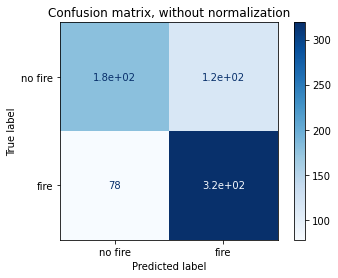

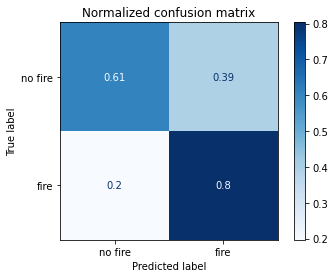

In [11]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [12]:
clf = RandomForestClassifier()
n_estimators = [100,300,500,800,1200]
max_depth = [5,8,15,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators,
             max_depth = max_depth,
             min_samples_split= min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 142.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 251.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 315.4min finished


In [13]:
print(bestF.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}


In [14]:
# Predict labels for test data
rf_pred = bestF.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_pred)*100}")
print(metrics.classification_report(y_test, rf_pred))

Accuracy: 72.7930535455861
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       294
           1       0.73      0.83      0.78       397

    accuracy                           0.73       691
   macro avg       0.73      0.71      0.71       691
weighted avg       0.73      0.73      0.72       691



Confusion matrix, without normalization
[[174 120]
 [ 68 329]]
Normalized confusion matrix
[[0.59 0.41]
 [0.17 0.83]]


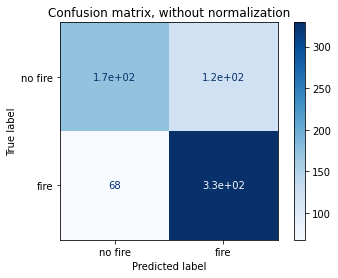

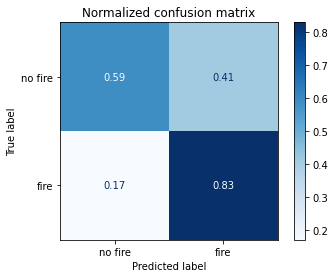

In [15]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(bestF, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()